# Proyecto BI - Análitica de Texto según ODS

## Etapa 1

## Objetivos

*   Aplicar la metodología de analítica de textos para la construcción de soluciones de analítica alineadas con los objetivos del negocio en un contexto de aplicación.
*   Planear la interacción con un grupo interdisciplinario para identificar usuarios y posibles herramientas a desarrollar para la interacción del resultado del modelo desarrollado.

## Problema
<p style="text-align: justify;"> Desarrollar un modelo de clasificación, con técnicas de aprendizaje automático, que permita relacionar de manera automática un texto según los ODS. Al igual que desarrollar una aplicación que facilite la interacción con el resultado de dicho modelo. El modelo podrá ser utilizado entonces para la interpretación y análisis de la información textual que es recopilada a través de diferentes fuentes por UNFPA en procesos de planeación participativa para el desarrollo a nivel territorial.


### 1. Instalación e importanción de librerías.

In [1017]:
!pip install ftfy

In [1018]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [1019]:
!pip install unidecode

In [1020]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions

In [1021]:
# librería para manejar las flexiones gramaticales en el idioma inglés.
# !pip install inflect
# !pip install pandas-profiling==2.7.1

In [1022]:
# librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1023]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1024]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
from pandas_profiling import ProfileReport
from unidecode import unidecode

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import nltk
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
nltk.download('wordnet')


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin
from nltk.tokenize import word_tokenize
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [1025]:
import warnings
warnings.filterwarnings("ignore")

In [1026]:
# Configuring pandas to show all cell content
pd.set_option("display.max_colwidth", None)

In [1027]:
# Downloading stopwords
nltk.download("punkt")
nltk.download("stopwords")
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1028]:
stop_words


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

### 2. Perfilamiento y entendimiento de los datos


#### Lectura de los datos.

In [1029]:
# Uso de la libreria pandas para la lectura de archivos excel
df = pd.read_excel('./data/cat_345.xlsx')
# Asignación a una nueva variable de los datos leidos
data_t=df


In [1030]:
data_t.shape

(3000, 2)

In [1031]:
data_t.sample(5)

,Textos_espanol,sdg
715,"Los internados no tomaron en consideración las culturas indígenas, la fisiología o psicología indígena. La educación en ruso y las estancias prolongadas lejos de la familia dieron como resultado el reemplazo gradual de la lengua materna por el ruso, crearon una brecha generacional, tuvieron un efecto negativo en la cohesión familiar y provocaron privaciones psicológicas. La retirada de las redes familiares y sociales y la interrupción de los mecanismos de transmisión cultural dieron como resultado la pérdida de la lengua materna, las habilidades tradicionales y las prácticas curativas indígenas.",3
1669,"La tutoría de carrera está diseñada para apoyar a los estudiantes en la consecución de sus objetivos postsecundarios, incluso a través de conexiones formales con los graduados de la escuela secundaria durante dos años después de la escuela secundaria. A cada estudiante se le asigna un trabajador de apoyo al estudiante (Student-Rjrent Support Worker, SPSW), que supervisa la asistencia a la escuela, el progreso académico y la participación en el programa, al tiempo que ayuda al estudiante a establecer relaciones estables con sus padres, profesores y otros estudiantes. La ayuda financiera de Pathways, como billetes de autobús y vales de almuerzo, se diseñó para eliminar las barreras financieras que dificultan la participación escolar.",4
616,"Las disparidades de cobertura entre grupos sociales y servicios sanitarios aconsejan prestar más atención a la coordinación entre los seguros obligatorios y los complementarios. Las reformas en curso para mejorar la prevención y la coordinación entre los proveedores de asistencia son pasos en la dirección correcta. Sin embargo, es necesario intensificar los avances en el desarrollo de sistemas de pago basados en la capitación, que pueden reducir los incentivos para aumentar el número de actos médicos y animar a los profesionales sanitarios a dedicar más tiempo a sus pacientes, y de sistemas de pago basados en los resultados en la atención primaria, para responder a la creciente prevalencia de las enfermedades crónicas y frenar la demanda inducida por los proveedores y las disparidades sociales en el acceso a la atención.",3
148,"Este documento concluye con métodos para acelerar el despliegue de normas en la sanidad pública y personal. Sin embargo, no garantizan plenamente los despliegues debido a la insuficiencia o falta de coincidencia de requisitos entre los proveedores de TIC y los usuarios cercanos. En particular, esta cuestión supone un obstáculo para el rápido lanzamiento de servicios de sanidad electrónica en las naciones emergentes. AdemÃ¡s, estos paÃses suelen requerir un lanzamiento de servicios mÃ¡s Ã¡gil que la publicaciÃ³n de normas.",3
541,"Los países con población indígena deberían alcanzar niveles de mortalidad infantil y de menores de 5 años entre su población indígena iguales a los de la población general. Para 2005, los países con niveles de mortalidad intermedios deberían aspirar a lograr una tasa de mortalidad infantil inferior a 50 muertes por cada 1.000 y una tasa de mortalidad de menores de 5 años inferior a 60 muertes por cada 1.000 nacimientos. Para 2015, todos los países deberían aspirar a alcanzar una tasa de mortalidad infantil inferior a 35 por cada 1.000 nacidos vivos y una tasa de mortalidad de menores de 5 años inferior a 45 por cada 1.000 nacidos vivos. Los países que alcancen antes estos niveles deben esforzarse por reducirlos aún más.",3


## 2.1 Limpieza de datos

In [1032]:
data_t["sdg"].value_counts(dropna=False, normalize=True)

sdg
3    0.333333
4    0.333333
5    0.333333
Name: proportion, dtype: float64

Se puede ver una distribución equitativa de los datos en los tres grupos de ODS

In [1033]:
data_t["Textos_espanol"] = data_t["Textos_espanol"].astype(str)

### Corrección de palabras mal codificadas

In [1034]:
import ftfy

def fix_malformed_words(text):
    # Utiliza ftfy para corregir problemas de codificación
    text = ftfy.fix_text(text)
    return text

# Aplica la función a tu DataFrame
data_t['Textos_espanol'] = data_t['Textos_espanol'].apply(fix_malformed_words)



In [1035]:
#Se verifica que se haya realizado la corrección
data_t.head(5)

,Textos_espanol,sdg
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la alta mor

### Eliminación de caracteres especiales y puntuación

In [1036]:
import re
import unicodedata
import inflect
from nltk.corpus import stopwords

# Esta lista contiene las stop words en español
spanish_stopwords = set(stopwords.words('spanish'))

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all integer occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in spanish_stopwords:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words


### Tokenización

In [1037]:
data_t['Textos_espanol'] = data_t['Textos_espanol'].apply(contractions.fix) #Aplica la corrección de las contracciones

In [1038]:
data_t['words'] = data_t['Textos_espanol'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
data_t.head()

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, numero, consultas, externas, especialistas, three hundred and nineteen, cada, mil, derechohabientes, sp, comparacion, three hundred and thirtyeight, six hundred and twenty, cada, mil, derechohabientes, imss, issste, respectivamente, si, bien, diferencias, pueden, reflejar, necesidad, desigual, poblacion, ligeramente, mayor, issste, pueden, justificarse, manera, numero, recetas, pudieron, ser, surtidas, totalidad, farmaceutico, debido, falta, existencias, thirtythree, dentro, sp, comparacion, fourteen, dentro, imss, segun, datos, encuesta, aunque, propias, cifras, institutos, ss, sugieren, tasas, mas, altas, recetas, surtidas, ambas, cifras, encuentran, mas, altas, ocde, gasto, bolsillo, reducido, significativamente, ultima, decada, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, traves, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[two thousand and seven, gobierno, central, financio, directamente, solo, 03, gasto, total, salud, realizo, transferencias, especificas, gasto, salud, ascendieron, 56, gasto, total, mayor, parte, gasto, presupuestario, salud, realizan, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atencion, poblacion, local, gobierno, provincial, proporciona, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[claramente, factores, juego, particular, variedad, barreras, determinantes, sociales, 

### Normalización de texto

In [1039]:
# Crear instancias de los stemmers y lematizadores
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_words(words):
    """Stem words in list of tokenized words"""
    stems = [stemmer.stem(word) for word in words]
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmas = []
    for word in words:
        pos = get_wordnet_pos(word)
        if pos:
            lemma = lemmatizer.lemmatize(word, pos)
            lemmas.append(lemma)
        else:
            lemmas.append(word)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(stems)
    return lemmas

def get_wordnet_pos(word):
    """Map POS tag to first character accepted by WordNetLemmatizer"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


In [1040]:
#Se verifica que se haya realizado la corrección
data_t.head(5)

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, numero, consultas, externas, especialistas, three hundred and nineteen, cada, mil, derechohabientes, sp, comparacion, three hundred and thirtyeight, six hundred and twenty, cada, mil, derechohabientes, imss, issste, respectivamente, si, bien, diferencias, pueden, reflejar, necesidad, desigual, poblacion, ligeramente, mayor, issste, pueden, justificarse, manera, numero, recetas, pudieron, ser, surtidas, totalidad, farmaceutico, debido, falta, existencias, thirtythree, dentro, sp, comparacion, fourteen, dentro, imss, segun, datos, encuesta, aunque, propias, cifras, institutos, ss, sugieren, tasas, mas, altas, recetas, surtidas, ambas, cifras, encuentran, mas, altas, ocde, gasto, bolsillo, reducido, significativamente, ultima, decada, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, traves, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[two thousand and seven, gobierno, central, financio, directamente, solo, 03, gasto, total, salud, realizo, transferencias, especificas, gasto, salud, ascendieron, 56, gasto, total, mayor, parte, gasto, presupuestario, salud, realizan, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atencion, poblacion, local, gobierno, provincial, proporciona, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[claramente, factores, juego, particular, variedad, barreras, determinantes, sociales, 

Selección de campos

In [1041]:
data_t['words'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
data_t

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,ejemplo numero consultas externas especialistas three hundred and nineteen cada mil derechohabientes sp comparacion three hundred and thirtyeight six hundred and twenty cada mil derechohabientes imss issste respectivamente si bien diferencias pueden reflejar necesidad desigual poblacion ligeramente mayor issste pueden justificarse manera numero recetas pudieron ser surtidas totalidad farmaceutico debido falta existencias thirtythree dentro sp comparacion fourteen dentro imss segun datos encuesta aunque propias cifras institutos ss sugieren tasas mas altas recetas surtidas ambas cifras encuentran mas altas ocde gasto bolsillo reducido significativamente ultima decada pesar esfuerzos lograr cobertura sanitaria universal traves reforma sp
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,two thousand and seven gobierno central financio directamente solo 03 gasto total salud realizo transferencias especificas gasto salud ascendieron 56 gasto total mayor parte gasto presupuestario salud realizan gobiernos condados condados pobres solo pueden ofrecer bajo nivel atencion poblacion local gobierno provincial proporciona subsidios lado oferta hospitales
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,claramente factores juego particular variedad barreras determinantes sociales pueden relacionados genero clase etnia casta idioma religion surgen estructuras normas procesos sociales arraigados aceptan incluso fomentan dist

In [1042]:
nuevo_df = data_t[['words', 'sdg']]
nuevo_df['sdg'] = ""
nuevo_df.to_csv('nuevo_archivo.csv', index=False)

# Entrenamiento del modelo con TF_IDF

En TF-IDF Los valores no son necesariamente enteros, ya que dependen de la frecuencia de un término en un documento específico y en la colección de documentos en su conjunto.

## Data splitting

In [1043]:
X_train, X_test, y_train, y_test = train_test_split(data_t[["words"]], data_t["sdg"], random_state=1, stratify=data_t['sdg'])

In [1044]:
X_train.shape, X_test.shape

((2250, 1), (750, 1))

In [1045]:
y_train.shape, y_test.shape

((2250,), (750,))

In [1046]:
#ver los primeros datos de entrenamiento
y_train[:5]

876     3
2518    5
2775    5
1910    4
2776    5
Name: sdg, dtype: int64

In [1047]:
pd.Series(y_train).value_counts(normalize=True)

sdg
3    0.333333
5    0.333333
4    0.333333
Name: proportion, dtype: float64

In [1048]:
pd.Series(y_test).value_counts(normalize=True)

sdg
4    0.333333
5    0.333333
3    0.333333
Name: proportion, dtype: float64

## Vectorización del texto

In [1049]:
# Supongamos que tienes un DataFrame llamado 'df' con una columna 'texto' que contiene tus textos preprocesados.
texts = X_train['words']

# Crea una instancia de TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize,  # Número máximo de características (ajusta según sea necesario)
                                   stop_words= stop_words, # Especifica las stop words
                                   lowercase=True)

# Ajusta y transforma tus datos de texto
X_tfidf = tfidf_vectorizer.fit_transform(texts)

# tfidf_matrix es una matriz que contiene las representaciones TF-IDF de tus textos

print(X_tfidf.shape)
print("Vocabulary size:", len(tfidf_vectorizer.vocabulary_))

(2250, 15111)
Vocabulary size: 15111


In [1050]:
tfidf_model = RandomForestClassifier(random_state=3)

In [1051]:
print("Shape de X_tfidf:", X_tfidf.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)
print("Ejemplos de y_train:", y_train[:10])  # Imprime las primeras 10 etiquetas
print("Ejemplos de y_test:", y_test[:10])    # Imprime las primeras 10 etiquetas

Shape de X_tfidf: (2250, 15111)
Shape de y_train: (2250,)
Shape de y_test: (750,)
Ejemplos de y_train: 876     3
2518    5
2775    5
1910    4
2776    5
2642    5
2251    5
1442    4
1028    4
1592    4
Name: sdg, dtype: int64
Ejemplos de y_test: 1731    4
1436    4
2611    5
2211    5
2955    5
1247    4
777     3
1253    4
1244    4
2180    5
Name: sdg, dtype: int64


In [1052]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

<Axes: >

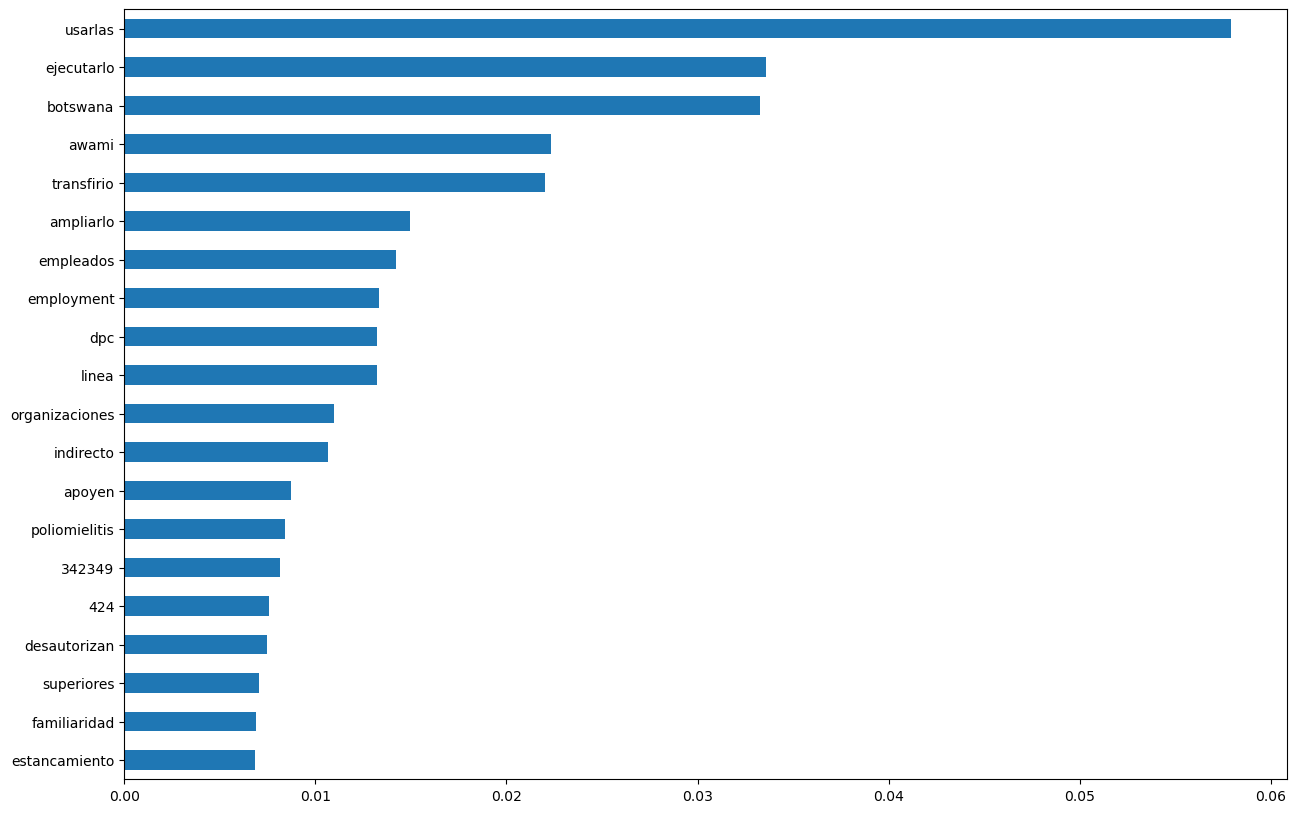

In [1053]:
pd.Series(tfidf_model.feature_importances_, index=tfidf_vectorizer.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [1054]:
tfidf_estimators = tfidf_model.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 98.46


In [1055]:

# predicciones en función de las características de entrenamiento vectorizadas
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
# predicciones en función de las características de prueba vectorizadas en X_test["words"]
y_test_tfidf_predict = tfidf_model.predict(tfidf_vectorizer.transform(X_test["words"]))

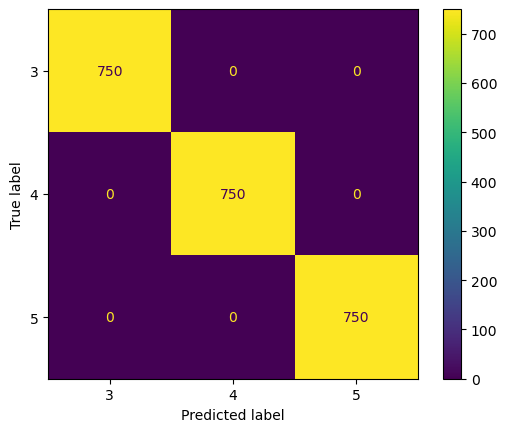

In [1056]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

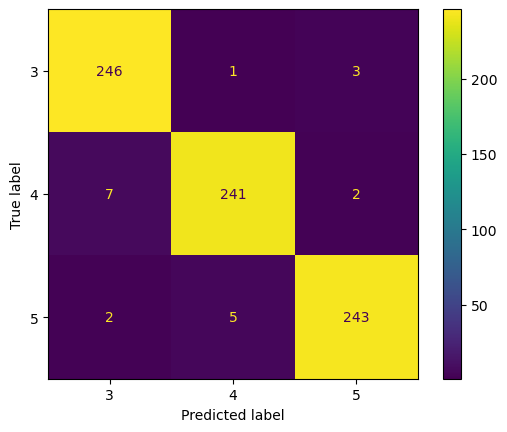

In [1057]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

## Métricas para del data frame de entrenamiento

In [1058]:
print("Precision (micro):", precision_score(y_train, y_train_tfidf_predict, average='micro'))
print("Recall (micro):", recall_score(y_train, y_train_tfidf_predict, average='micro'))
print("F1 (micro):", f1_score(y_train, y_train_tfidf_predict, average='micro'))


Precision (micro): 1.0
Recall (micro): 1.0
F1 (micro): 1.0


In [1059]:
print("Precision (macro):", precision_score(y_train, y_train_tfidf_predict, average='macro'))
print("Recall (macro):", recall_score(y_train, y_train_tfidf_predict, average='macro'))
print("F1 (macro):", f1_score(y_train, y_train_tfidf_predict, average='macro'))


Precision (macro): 1.0
Recall (macro): 1.0
F1 (macro): 1.0


In [1060]:
print("Precision (weighted):", precision_score(y_train, y_train_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_train, y_train_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_train, y_train_tfidf_predict, average='weighted'))


Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


## Métricas para de data frame de prueba

In [1061]:
print("Precision (micro):", precision_score(y_test, y_test_tfidf_predict, average='micro'))
print("Recall (micro):", recall_score(y_test, y_test_tfidf_predict, average='micro'))
print("F1 (micro):", f1_score(y_test, y_test_tfidf_predict, average='micro'))

Precision (micro): 0.9733333333333334
Recall (micro): 0.9733333333333334
F1 (micro): 0.9733333333333334


In [1062]:
print("Precision (macro):", precision_score(y_test, y_test_tfidf_predict, average='macro'))
print("Recall (macro):", recall_score(y_test, y_test_tfidf_predict, average='macro'))
print("F1 (macro):", f1_score(y_test, y_test_tfidf_predict, average='macro'))

Precision (macro): 0.9734176980182174
Recall (macro): 0.9733333333333333
F1 (macro): 0.9733266512270969


In [1063]:
print("Precision (weighted):", precision_score(y_test, y_test_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_test_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_test, y_test_tfidf_predict, average='weighted'))

Precision (weighted): 0.9734176980182174
Recall (weighted): 0.9733333333333334
F1 (weighted): 0.9733266512270969


## Selección del modelo

### Primer modelo

In [1064]:
X_train_1=X_train
X_test_1=X_test
y_train_1=y_train
y_test_1=y_test

In [1065]:
parametros_1 = {
    "vectorizer": TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words),
    "vectorizer__lowercase": True,
    "classifier__n_estimators": 100,
    "classifier__criterion": 'gini',
    "classifier__max_depth": 50
}

In [1066]:
pipeline_1 = Pipeline(steps=[
    ("vectorizer", parametros_1["vectorizer"]),
    ("classifier", RandomForestClassifier(
        n_estimators=parametros_1["classifier__n_estimators"],
        criterion=parametros_1["classifier__criterion"],
        max_depth=parametros_1["classifier__max_depth"],
        random_state=4
    ))
])

In [1067]:
# Entrena el modelo con tus datos
pipeline_1.fit(X_train_1["words"], y_train_1)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x12fd95240>)),
                ('classifier',
                 RandomForestClassifier(max_depth=50, random_state=4))])

In [1068]:
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_predict_1 = pipeline_1.predict(X_train_1["words"])
y_test_predict_1 = pipeline_1.predict(X_test_1["words"])

In [1069]:
print("Precision (weighted):", precision_score(y_train_1, y_train_predict_1, average='weighted'))
print("Recall (weighted):", recall_score(y_train_1, y_train_predict_1, average='weighted'))
print("F1 (weighted):", f1_score(y_train_1, y_train_predict_1, average='weighted'))

Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


In [1070]:
print("Precision (weighted):", precision_score(y_test_1, y_test_predict_1, average='weighted'))
print("Recall (weighted):", recall_score(y_test_1, y_test_predict_1, average='weighted'))
print("F1 (weighted):", f1_score(y_test_1, y_test_predict_1, average='weighted'))

Precision (weighted): 0.9695690498076077
Recall (weighted): 0.9693333333333334
F1 (weighted): 0.9693568827441543


### Segundo Modelo

In [1071]:
X_train_2=X_train
X_test_2=X_test
y_train_2=y_train
y_test_2=y_test

In [1072]:
parametros_2 = {
    "vectorizer": TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words),
    "vectorizer__lowercase": True,
    "classifier__n_estimators": 300,
    "classifier__criterion": 'gini',
    "classifier__max_depth": 100
}

In [1073]:
pipeline_2 = Pipeline(steps=[
    ("vectorizer", parametros_2["vectorizer"]),
    ("classifier", RandomForestClassifier(
        n_estimators=parametros_2["classifier__n_estimators"],
        criterion=parametros_2["classifier__criterion"],
        max_depth=parametros_2["classifier__max_depth"],
        random_state=4
    ))
])

In [1074]:
# Entrena el modelo con tus datos
pipeline_2.fit(X_train_2["words"], y_train_2)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x12fd95240>)),
                ('classifier',
                 RandomForestClassifier(max_depth=100, n_estimators=300,
                                        random_state=4))])

In [1075]:
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_predict_2 = pipeline_2.predict(X_train_2["words"])
y_test_predict_2 = pipeline_2.predict(X_test_2["words"])

In [1076]:
print("Precision (weighted):", precision_score(y_train_2, y_train_predict_2, average='weighted'))
print("Recall (weighted):", recall_score(y_train_2, y_train_predict_2, average='weighted'))
print("F1 (weighted):", f1_score(y_train_2, y_train_predict_2, average='weighted'))

Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


In [1077]:
print("Precision (weighted):", precision_score(y_test_2, y_test_predict_2, average='weighted'))
print("Recall (weighted):", recall_score(y_test_2, y_test_predict_2, average='weighted'))
print("F1 (weighted):", f1_score(y_test_2, y_test_predict_2, average='weighted'))

Precision (weighted): 0.980112114934346
Recall (weighted): 0.98
F1 (weighted): 0.9800069226577939


### Tercer modelo

In [1078]:
X_train_3=X_train
X_test_3=X_test
y_train_3=y_train
y_test_3=y_test

In [1079]:
parametros_3 = {
    "vectorizer": TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words),
    "vectorizer__lowercase": False,
    "classifier__n_estimators": 350,
    "classifier__criterion": 'gini',
    "classifier__max_depth": 100
}

In [1080]:
pipeline_3 = Pipeline(steps=[
    ("vectorizer", parametros_3["vectorizer"]),
    ("classifier", RandomForestClassifier(
        n_estimators=parametros_3["classifier__n_estimators"],
        criterion=parametros_3["classifier__criterion"],
        max_depth=parametros_3["classifier__max_depth"],
        random_state=4
    ))
])

In [1081]:
# Entrena el modelo con tus datos
pipeline_3.fit(X_train_3["words"], y_train_3)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x12fd95240>)),
                ('classifier',
                 RandomForestClassifier(max_depth=100, n_estimators=350,
                                        random_state=4))])

In [1082]:
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_predict_3 = pipeline_3.predict(X_train_3["words"])
y_test_predict_3 = pipeline_3.predict(X_test_3["words"])

In [1083]:
print("Precision (weighted):", precision_score(y_train_3, y_train_predict_3, average='weighted'))
print("Recall (weighted):", recall_score(y_train_3, y_train_predict_3, average='weighted'))
print("F1 (weighted):", f1_score(y_train_3, y_train_predict_3, average='weighted'))

Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


In [1084]:
print("Precision (weighted):", precision_score(y_test_3, y_test_predict_3, average='weighted'))
print("Recall (weighted):", recall_score(y_test_3, y_test_predict_3, average='weighted'))
print("F1 (weighted):", f1_score(y_test_3, y_test_predict_3, average='weighted'))

Precision (weighted): 0.97883455634278
Recall (weighted): 0.9786666666666667
F1 (weighted): 0.9786810454293615


### Generar predicciones

In [1085]:
nuevo_df = pd.read_csv('nuevo_archivo.csv', sep=',', encoding = 'utf-8')

In [1086]:
nuevo_df.shape

(3000, 2)

In [1087]:
nuevo_df.sample(5)

,words,sdg
1788,estandares marcos liderazgo escolar profesional tambien deben aclarar resaltar importancia liderazgo escolar evaluacion evaluacion general valoracion docentes evaluacion escolar particular dar ejemplo liderazgo distribuido escuelas secundarias puede ayudar brindar retroalimentacion informal regular maestros areas tematicas lider escolar individual podria necesariamente equipado considerando falta experiencia diferentes materias ocde two thousand and nine mismo tiempo distribuir liderazgo escuelas necesariamente disminuye carga trabajo lider escolar puede crear nuevos desafios lideres escolares vez requieren apoyo continuo,NaN
1142,jovenes decisiones toman estudiar dentro despues periodos educacion obligatoria vuelto mas importantes mas dificiles tomar objetivo orientacion profesional permitir jovenes tomen decisiones adecuadas educacion carrera ahora futuro ausencia informacion fiable fidedigna apoyo debe proporcionar buena orientacion profesional tales decisiones hacen mas dificiles costes personales sociales menudo manifiestan desajustes cualificaciones perspectivas empleo insatisfactorias ultimos anos aumentado importancia servicios orientacion profesional rapidos cambios economicos educativos dado lugar transiciones escuela trabajo ahora mas largas complejas,NaN
85,dispone indicadores calidad nivel nacional deberian poder desglosarse nivel hospitalario claro responsables politicos gestores profesionales sanitarios utilicen sistematicamente indicadores informacion calidad atencion primaria tambien escasa ejemplo letonia solo realiza unas pocas encuestas relacionadas salud mientras paises ocde utilizan encuestas herramientas importantes recopilar amplia gama informacion incluida relativa experiencia pacientes coordinacion asistencia seguridad pacientes,NaN
2133,areas mayor potencial explotar fuerza laboral alemana madres inactivas trabajadoras tiempo parcial mejor distribucion trabajo remunerado hogar acompanada politicas publicas coherentes ayuda madres mantener vinculo mercado laboral continuar carreras mujeres alemanas jovenes buena educacion comparacion hombres alemanes jovenes 321 mujeres twentyfive thirtyfour anos completado educacion terciaria comparacion 279 pares masculinos capitulo two,NaN
466,ejemplo finlandia reduccion numero medicos promulgada principios anos noventa frenar gasto sanitario provoco fuerte descenso numero estudiantes medicina dio lugar numero insuficiente medicos anos siguientes revirtiendo lentamente ocde 2012a controles precio medicamentos suelen fijar precio maximo farmacos establecer tope beneficios empresas farmaceuticas gran mayoria paises ocde aplican algun tipo regulacion precios farmaceuticos paris etal,NaN


In [1088]:
nuevo_df['sdg'] = pipeline_2.predict(nuevo_df['words'])

In [1089]:
nuevo_df['sdg'].describe()

count    3000.000000
mean        3.997667
std         0.817242
min         3.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: sdg, dtype: float64

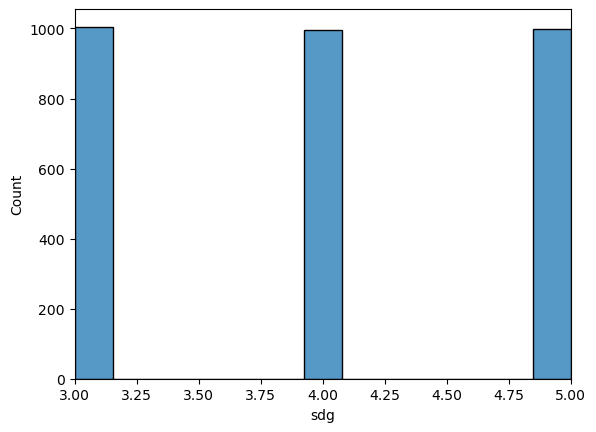

In [1094]:
# Create a histogram plot of selling prices
import seaborn as sns

# Create a histogram plot of selling prices
sns.histplot(nuevo_df['sdg'])

plt.xlim(3, 5)

# Display the plot
plt.show()

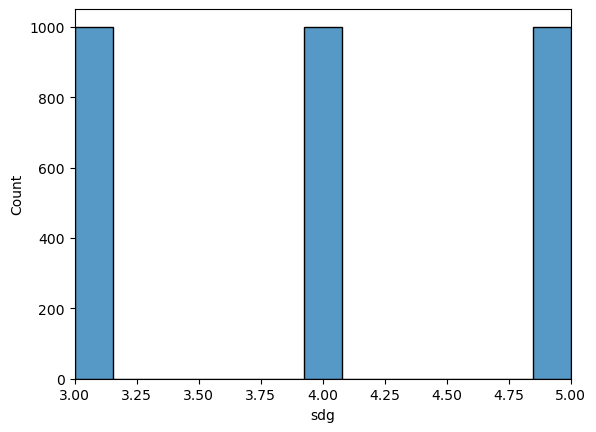

In [1095]:
sns.histplot(data_t['sdg'])
plt.xlim(3, 5)
plt.show()

In [1096]:
nuevo_df.sample(5)

,words,sdg
580,peru prevalencia tabaquismo mayor promedio ocde hombres menor mujeres 346 hombres 83 mujeres mayores fifteen anos peru usaban tabaco diariamente two thousand and thirteen comparacion 242 155 respectivamente paises ocde ocde two thousand and sixteen mas bajo promedio ocde 88 litros two thousand and thirteen ocde two thousand and sixteen embargo 232 poblacion peruana ve afectada consumo excesivo alcohol 352 hombres 127 mujeres,3
2207,decada one thousand nine hundred and ninety finales two thousand dos tercios paises tasas empleo femenino aumentaron mas mujeres cuyos maridos encontraban deciles ingresos mas altos encontraban parte inferior distribucion ciertos paises italia mexico tasas empleo esposas personas altos ingresos aumentaron mas esposas personas bajos ingresos fines decada two thousand mientras principios decada one thousand nine hundred and ninety ocurrio contrario solo incluye parejas mujer hombre,5
813,factores incluyen edad madre residencia urbanarural caracteristicas clave nino sexo orden nacimiento duracion intervalo nacimientos anterior politicas salud enfocan reducir desigualdades propuestas fondo naciones unidas infancia unicef parecen tener mas probabilidades generar grandes retornos inversiones realizan paises evitando mas muertes infantiles maternas politicas enfocadas mejorar niveles generales salud mortalidad prestar atencion papel desigualdades si bien importante invertir nivel mundial salud materna adolescente infantil every woman every child two thousand and fifteen fundamental esfuerzos dirijan ninos economicamente mas vulnerables familias,3
42,respuesta director general presento informe reforma trabajo oms gestion emergencias sanitarias programa emergencias sanitarias oms 70723 secretario general incluyen revision the neglected dimension of global security framework to counter infectious disease crises academia nacional medicina nam 2 b iniciativa conjunta universidad harvard london school of hygiene and tropical medicine moon two thousand and fifteen c revision panel independiente creado fundacion bill melinda gates d revision msf two thousand and fifteen,3
2790,enfoque informe instrumentos promover equilibrio genero mundo academico luego presenta descripcion general principales medidas programas politica iniciados autoridades gubernamentales promover equilibrio genero investigacion tambien dan ejemplos acciones tomadas consejos nacionales investigacion nordicos institucion nordica conjunta nordforsk abordar equilibrio genero,5
